In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import OneHotEncoder


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam

In [15]:
# FONT 깨질때 폰트깨질때
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [16]:
df = pd.read_excel('./최종 데이터 그래프그리기용.xlsx') 
print(df)

      Sample_ID GROUP  COHORT SEX  AGE     Trait FitbitOX      Fitbit_ID  HTN  \
0         S0001   SMI       2   M   60  fitbit_O        O  sevrance00001  NaN   
1         S0002   SMI       2   M   61  fitbit_O        O  sevrance00002  NaN   
2         S0003   SMI       2   F   52  fitbit_O        O  sevrance00003  NaN   
3         S0004   SMI       2   F   41  fitbit_O        O  sevrance00004  NaN   
4         S0005   SMI       2   F   41  fitbit_O        O  sevrance00005  NaN   
..          ...   ...     ...  ..  ...       ...      ...            ...  ...   
383  MetS_S0280  MetS       1   F   24  fitbit_O        O   gnfmmets+139  NaN   
384  MetS_S0281  MetS       1   F   44  fitbit_O        O   gnfmmets+140  NaN   
385  MetS_S0282  MetS       1   F   37  fitbit_O        O   gnfmmets+141  1.0   
386  MetS_S0283  MetS       1   M   51  fitbit_X        X              X  NaN   
387  MetS_S0284  MetS       1   F   42  fitbit_X        X              X  NaN   

      DM  ...  BDI_Q13_2 BD

In [17]:
psqi_df=df[['Sample_ID','GROUP','COHORT','SEX','AGE','Insulin _1','FatPercentage _1','TG_1','BMI_1','AST_1','BUN_1','HDL_1','DBP_1','Waist_1','SBP_1','Fat_1_x','LDL_1',
            'PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1',
              'Insulin _2','FatPercentage_2','TG_2','BMI_2','AST_2','BUN_2','HDL_2','DBP_2','Waist_2','SBP_2','Fat_2_x','LDL_2',
            'PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2','PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']]

In [18]:
psqi_df

,Sample_ID,GROUP,COHORT,SEX,AGE,Insulin _1,FatPercentage _1,TG_1,BMI_1,AST_1,...,PSQI_Q5e_2,PSQI_Q5f_2,PSQI_Q5g_2,PSQI_Q5h_2,PSQI_Q5i_2,PSQI_Q5j_2,PSQI_Q6_2,PSQI_Q7_2,PSQI_Q8_2,PSQI_Q9_2
0,S0001,SMI,2,M,60,7.7,15.0,81,21.110190,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,S0002,SMI,2,M,61,5.4,29.5,106,27.782064,29.0,...,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
2,S0003,SMI,2,F,52,5.1,39.1,231,24.944742,16.0,...,3.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
3,S0004,SMI,2,F,41,4.2,29.1,94,22.620489,16.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
4,S0005,SMI,2,F,41,3.2,24.6,70,20.524157,26.0,...,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,F,24,11.3,34.4,51,34.803410,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,F,44,10.6,43.8,104,30.903615,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,F,37,12.2,35.8,128,28.676533,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,M,51,10.4,26.8,163,24.549738,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#보조 호르몬 요법을 받고 있는 Cohort 3 제거 Filter 적용
psqi_df = psqi_df[(psqi_df['COHORT'] != 3)]
psqi_df

,Sample_ID,GROUP,COHORT,SEX,AGE,Insulin _1,FatPercentage _1,TG_1,BMI_1,AST_1,...,PSQI_Q5e_2,PSQI_Q5f_2,PSQI_Q5g_2,PSQI_Q5h_2,PSQI_Q5i_2,PSQI_Q5j_2,PSQI_Q6_2,PSQI_Q7_2,PSQI_Q8_2,PSQI_Q9_2
0,S0001,SMI,2,M,60,7.7,15.0,81,21.110190,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,S0002,SMI,2,M,61,5.4,29.5,106,27.782064,29.0,...,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
2,S0003,SMI,2,F,52,5.1,39.1,231,24.944742,16.0,...,3.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
3,S0004,SMI,2,F,41,4.2,29.1,94,22.620489,16.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
4,S0005,SMI,2,F,41,3.2,24.6,70,20.524157,26.0,...,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,F,24,11.3,34.4,51,34.803410,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,F,44,10.6,43.8,104,30.903615,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,F,37,12.2,35.8,128,28.676533,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,M,51,10.4,26.8,163,24.549738,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
psqi_df=psqi_df.dropna()
psqi_df.reset_index(drop=True, inplace=True)
psqi_df.isnull().sum()
psqi_df=psqi_df.drop(["Sample_ID", "GROUP", "COHORT"],axis=1)
#1분, 매일다름, 정해진간이없음 삭제

In [21]:
psqi_df["SEX"] = psqi_df["SEX"].apply(lambda x: 1. if x=='M' else 0.)

In [22]:
psqi_df["Insulin _1"] = psqi_df["Insulin _1"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)
psqi_df["Insulin _2"] = psqi_df["Insulin _1"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)

In [40]:
#x 배열 생성 (x=임의+선별+PSQI)
X1=psqi_df[['AGE','SEX','DBP_1','Waist_1','Insulin _1','SBP_1','Fat_1_x','LDL_1','FatPercentage _1','TG_1','AST_1','BUN_1','BMI_1',
            'PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']].values

X2=psqi_df[['AGE','SEX','DBP_2','Waist_2','Insulin _2','SBP_2','Fat_2_x','LDL_2','FatPercentage_2','TG_2','AST_2','BUN_2','BMI_2',
            'PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2','PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']].values
X=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=HDL)
Y1= psqi_df[['HDL_1']].values
Y2= psqi_df[['HDL_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

In [74]:
Y

array([[ 57.],
       [ 68.],
       [ 46.],
       [ 96.],
       [ 62.],
       [ 77.],
       [ 69.],
       [ 71.],
       [ 54.],
       [ 58.],
       [ 50.],
       [ 60.],
       [ 64.],
       [ 51.],
       [ 64.],
       [ 46.],
       [ 74.],
       [ 52.],
       [ 55.],
       [ 49.],
       [ 71.],
       [ 58.],
       [ 52.],
       [ 80.],
       [ 85.],
       [ 83.],
       [ 83.],
       [ 69.],
       [ 79.],
       [ 72.],
       [ 58.],
       [ 73.],
       [ 57.],
       [ 55.],
       [ 48.],
       [ 52.],
       [ 77.],
       [ 86.],
       [ 72.],
       [ 53.],
       [ 53.],
       [ 61.],
       [ 56.],
       [ 86.],
       [ 79.],
       [ 60.],
       [ 61.],
       [ 79.],
       [ 50.],
       [ 68.],
       [ 62.],
       [ 76.],
       [ 42.],
       [ 52.],
       [ 78.],
       [ 42.],
       [ 67.],
       [ 63.],
       [ 57.],
       [ 42.],
       [ 52.],
       [ 75.],
       [ 55.],
       [ 64.],
       [ 75.],
       [ 91.],
       [10

In [78]:
np.mean(Y, axis=0)

array([59.97443182])

In [23]:
#x 배열 생성 (x=PSQI, AGE, SEX, BMI)
X1=psqi_df[['AGE','SEX','BMI_1','PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']].values

X2=psqi_df[['AGE','SEX','BMI_2','PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2','PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']].values
X=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=HDL)
Y1= psqi_df[['HDL_1']].values
Y2= psqi_df[['HDL_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

In [41]:
len(X), len(Y)

(352, 352)

In [42]:
X.shape, Y.shape

((352, 39), (352, 1))

# 정규화

In [43]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [83]:
np.random.seed(100)
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)

In [84]:
X.shape, Y.shape

((352, 39), (352, 1))

In [85]:
dim=X.shape[1]
dim

39

# MLP

In [86]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=100, batch_size=4)
model.evaluate(x_test, y_test) 

Epoch 1/100
71/71 [==============================] - 0s 766us/step - loss: 3424.6086 - mse: 3424.6086
Epoch 2/100
71/71 [==============================] - 0s 822us/step - loss: 2600.8413 - mse: 2600.8413
Epoch 3/100
71/71 [==============================] - 0s 804us/step - loss: 1511.2506 - mse: 1511.2506
Epoch 4/100
71/71 [==============================] - 0s 784us/step - loss: 629.8246 - mse: 629.8246
Epoch 5/100
71/71 [==============================] - 0s 778us/step - loss: 317.4150 - mse: 317.4150
Epoch 6/100
71/71 [==============================] - 0s 784us/step - loss: 250.0092 - mse: 250.0092
Epoch 7/100
71/71 [==============================] - 0s 798us/step - loss: 213.9458 - mse: 213.9458
Epoch 8/100
71/71 [==============================] - 0s 869us/step - loss: 186.8755 - mse: 186.8755
Epoch 9/100
71/71 [==============================] - 0s 831us/step - loss: 170.3747 - mse: 170.3747
Epoch 10/100
71/71 [==============================] - 0s 712us/step - loss: 156.8229 - mse: 15

[182.1334991455078, 182.1334991455078]

In [87]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                1280      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

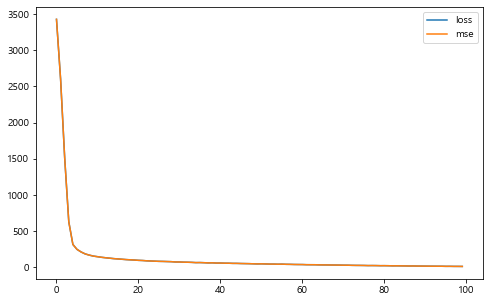

In [88]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [89]:
y_train_p = model.predict(x_train)
y_test_p = model.predict(x_test)

In [90]:
for t,p in zip(y_train,y_train_p):
    print(t,p)

[77.] [71.77286]
[80.] [76.345024]
[58.] [57.257057]
[46.] [46.1153]
[47.] [44.21047]
[49.] [49.52285]
[49.] [55.919174]
[72.] [66.96422]
[66.] [70.00054]
[56.] [63.84559]
[65.] [59.76496]
[70.] [66.44936]
[99.] [88.91079]
[83.] [78.897484]
[49.] [48.23841]
[116.] [113.4002]
[53.] [48.862488]
[60.] [60.81823]
[53.] [57.702923]
[68.] [70.22888]
[50.] [51.724655]
[50.] [49.423523]
[48.] [49.59887]
[46.] [44.542313]
[47.] [48.931953]
[78.] [77.06371]
[54.] [56.42025]
[91.] [85.49294]
[49.] [47.38166]
[50.] [51.384266]
[50.] [50.63944]
[46.] [45.101173]
[49.] [48.821426]
[50.] [52.03265]
[61.] [60.718628]
[80.] [69.643715]
[45.] [46.942574]
[42.] [41.825645]
[69.] [71.6911]
[82.] [81.29451]
[44.] [43.877167]
[80.] [81.378815]
[49.] [51.98535]
[79.] [77.07312]
[48.] [47.404118]
[66.] [66.71819]
[65.] [63.86519]
[53.] [53.393726]
[54.] [55.164986]
[57.] [60.51695]
[50.] [53.16134]
[50.] [50.337112]
[48.] [47.580093]
[68.] [67.71638]
[58.] [58.868095]
[69.] [65.94884]
[50.] [53.69629]
[64.] [

In [91]:
for t,p in zip(y_test,y_test_p):
    print(t,p)

[55.] [55.551544]
[54.] [44.854755]
[71.] [70.47498]
[61.] [43.189804]
[60.] [88.56904]
[55.] [76.06163]
[49.] [55.3957]
[62.] [70.34777]
[67.] [59.3751]
[63.] [80.39477]
[68.] [75.119835]
[70.] [43.36816]
[62.] [58.65548]
[58.] [64.776695]
[39.] [42.20261]
[67.] [74.718376]
[48.] [41.035004]
[70.] [68.48876]
[90.] [48.683716]
[57.] [75.21619]
[60.] [71.65494]
[75.] [60.883816]
[86.] [79.47718]
[56.] [56.37828]
[64.] [91.57122]
[46.] [41.316147]
[46.] [52.577152]
[44.] [53.925903]
[46.] [57.832653]
[63.] [60.309658]
[47.] [50.55951]
[64.] [72.418365]
[53.] [54.36197]
[77.] [76.91493]
[44.] [42.696484]
[76.] [69.3168]
[78.] [69.72013]
[78.] [71.4353]
[69.] [89.98076]
[55.] [64.37375]
[67.] [52.742645]
[67.] [81.09654]
[59.] [65.10496]
[83.] [52.3517]
[51.] [45.577812]
[51.] [44.60873]
[75.] [73.15927]
[69.] [70.16495]
[28.] [54.828644]
[58.] [58.65799]
[75.] [47.08869]
[64.] [59.88176]
[96.] [69.07462]
[52.] [62.68253]
[35.] [40.990894]
[55.] [56.062233]
[58.] [56.84028]
[58.] [45.16308

In [92]:
y_train_list=np.array(y_train).flatten().tolist() #y_train 리스트
y_test_list=np.array(y_test).flatten().tolist() #y_test 리스트
y_p_train_list=np.array(y_train_p).flatten().tolist() #y_train 예측 리스트
y_p_test_list=np.array(y_test_p).flatten().tolist() #y_test 예측 리스트

In [93]:
#평균 성능 테스트
scores = 0
mean=np.mean(Y, axis=0)
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= mean <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= mean <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 50.89 %
test set prediction accuracy: 56.34 %


In [94]:
#오차 범위 5 설정

scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 86.48 %
test set prediction accuracy: 28.17 %


In [95]:
#오차 범위 10 설정

scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 98.22 %
test set prediction accuracy: 66.20 %


In [96]:
#오차 범위 20 설정

scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-20 <= y_p_train_list[i] <= y_train_list[i]+20:
        scores+=1

accuracy=scores/len(y_train)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-20 <= y_p_test_list[i] <= y_test_list[i]+20:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 100.00 %
test set prediction accuracy: 84.51 %


# 오차범위 별 허용 예측 정확도
## <Y=HDL>
### 1. PSQI, AGE, SEX, BMI
- <오차범위 +-10> <br>
train: 45.07 % <br>
test: 50.70 % <br>
- <오차범위 +-20> <br>
train: 81.69 % <br>
test: 73.24 % <br>